In [1]:
!pip install spatialde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for NaiveDE: filename=NaiveDE-1.2.0-py3-none-any.whl size=5712 sha256=f5c81159c958b6d9e37064d225d9b22f23e6b0df44f5df7a30947dc834a31cf1
  Stored in directory: /root/.cache/pip/wheels/01/34/53/eff6dafc79c8f34e98fce9705fbcbc458461172e53adb65d16
Successfully built NaiveDE


In [ ]:
#This isn't needed as it does not always work rather download the data described in the next cell 
!git clone https://github.com/Teichlab/SpatialDE.git

In [ ]:
#To download data go to figure share https://figshare.com/articles/software/SpatialDE/17065217 if cloning git repo and using git lfs fails

In [4]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

import NaiveDE
import SpatialDE


Populating the interactive namespace from numpy and matplotlib


###Mount google drive 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Saving Rep11_MOB_0.csv to Rep11_MOB_0.csv


###Load data from google drive



###Analysis of olfactory data (Stahl et al. 2016) 
####Data can be downloaded from the figshare link above

In [5]:
counts = pd.read_csv('/content/drive/MyDrive/SpatialDEData/Analysis/MouseOB/data/Rep11_MOB_0.csv', index_col=0)
counts = counts.T[counts.sum(0) >= 3].T  # Filter practically unobserved genes

print(counts.shape)
counts.iloc[:5, :5]


(262, 14859)


,Nrf1,Zbtb5,Ccnl1,Lrrfip1,Bbs1
16.92x9.015,1,1,1,2,1
16.945x11.075,0,0,3,2,2
16.97x10.118,0,1,1,0,0
16.939x12.132,1,0,1,0,4
16.949x13.055,0,0,0,3,0


####Load sample information and align count matrix with metadata


In [6]:
sample_info = pd.read_csv('/content/drive/MyDrive/SpatialDEData/Analysis/MouseOB/MOB_sample_info.csv', index_col=0)
counts = counts.loc[sample_info.index]  # Align count matrix with metadata table

sample_info.head(5)


,x,y,total_counts
16.92x9.015,16.920,9.015,18790
16.945x11.075,16.945,11.075,36990
16.97x10.118,16.970,10.118,12471
16.939x12.132,16.939,12.132,22703
16.949x13.055,16.949,13.055,18641


####Plot x and y coordinates of the spatial samples

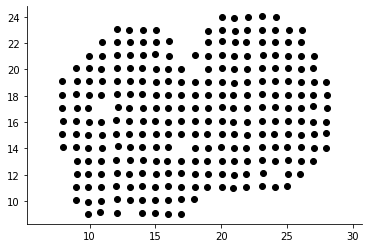

In [8]:
figsize(6, 4)
plt.scatter(sample_info['x'], sample_info['y'], c='k');
plt.axis('equal');


##### "Our method assumes normally distributed noise, but the data we are using is from expression counts, and empirically seems to follow a negative binomial distribution. We use technique by Anscombe to approximately transform the data to normal distributed noise."

"Secondly, library size or sequencing depth of the spatial samples will bias the expression of every gene. We use linear regression to account for this effect before performing the spatial test."



In [7]:
norm_expr = NaiveDE.stabilize(counts.T).T
resid_expr = NaiveDE.regress_out(sample_info, norm_expr.T, 'np.log(total_counts)').T



####This is the key step to get the results. Here I am running for all 14859 genes sampled but you can decide how many you want to look at. (Takes about 21 minutes for 262 spots x 14859 genes count matrix)

In [9]:
sample_resid_expr = resid_expr.sample(n=14859, axis=1, random_state=1)

X = sample_info[['x', 'y']]
results = SpatialDE.run(X, sample_resid_expr)


/usr/local/lib/python3.8/dist-packages/SpatialDE/base.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])
/usr/local/lib/python3.8/dist-packages/SpatialDE/base.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/14859 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/SpatialDE/base.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  s2_logdelta = 1. / (derivative(LL_obj, np.log(max_delta), n=2) ** 2)


  0%|          | 0/14859 [00:00<?, ?it/s]

  0%|          | 0/14859 [00:00<?, ?it/s]

  0%|          | 0/14859 [00:00<?, ?it/s]

  0%|          | 0/14859 [00:00<?, ?it/s]

  0%|          | 0/14859 [00:00<?, ?it/s]

  0%|          | 0/14859 [00:00<?, ?it/s]

  0%|          | 0/14859 [00:00<?, ?it/s]

  0%|          | 0/14859 [00:00<?, ?it/s]

  0%|          | 0/14859 [00:00<?, ?it/s]

####Visualize results

In [10]:
results.head().T


,0,1,2,3,4
FSV,0.999955,0.0,0.0,0.0,0.0
M,4,4,4,4,4
g,2410016O06Rik,Arpp19,Srsf7,Wbp7,Cpsf3l
l,0.402001,0.402001,0.402001,0.402001,0.402001
max_delta,0.000045,485165195.40979,485165195.40979,485165195.40979,485165195.40979
max_ll,-52.258894,-107.684919,-114.476815,-112.663915,-49.167156
max_mu_hat,-0.826851,-2.218453,-6.678107,-2.250439,0.146089
max_s2_t_hat,0.666985,0.0,0.0,0.0,0.0
model,SE,SE,SE,SE,SE
n,260,260,260,260,260


####Extract genes (g), A parameter indicating the distance scale a gene changes expression over (l), qvalues (qval)

In [11]:
results.sort_values('qval').head(10)[['g', 'l', 'qval']]

,g,l,qval
10772,Cpe,1.135190,1.146528e-09
11473,Fabp7,1.135190,6.899293e-07
11329,Kif5b,1.135190,4.071584e-06
11104,Cck,1.135190,4.071584e-06
11409,Apod,1.135190,4.189268e-06
11942,Apoe,1.907609,5.705817e-06
12485,Sparcl1,1.907609,2.987377e-05
11284,Apc,1.135190,3.622121e-05
11398,Doc2g,1.135190,5.122702e-05
11611,Marcks,1.135190,5.197451e-05


####Visualize the spatially differentially expressed genes

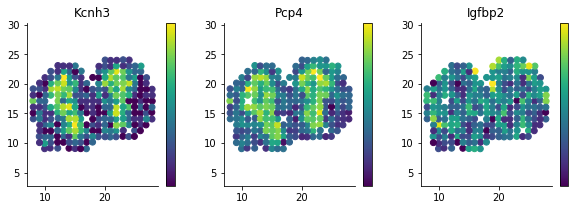

In [12]:
figsize(10, 3)
for i, g in enumerate(['Kcnh3', 'Pcp4', 'Igfbp2']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);


####Genes that are not spatially differentially expressed

In [13]:
results.sort_values('qval').tail(10)[['g', 'l', 'qval']]


,g,l,qval
4953,Acan,0.402001,0.975231
4954,Pfkfb4,0.402001,0.975231
4955,Brwd1,0.402001,0.975231
4956,Tox4,0.402001,0.975231
4957,Kctd11,0.402001,0.975231
4958,Rrp12,0.402001,0.975231
4959,Gm8884,0.402001,0.975231
4960,Bmpr1b,0.402001,0.975231
4948,Dtwd1,0.402001,0.975231
14858,Fam213b,15.211491,0.975231


####Visualize genes that are not spatially differentially expressed

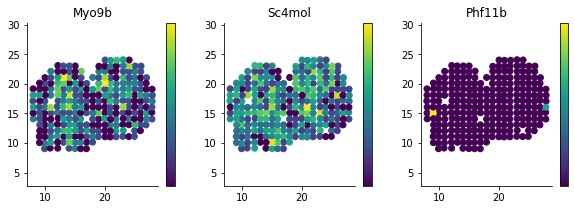

In [14]:
figsize(10, 3)
for i, g in enumerate(['Myo9b', 'Sc4mol', 'Phf11b']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);


####In regular differential expression analysis, we usually investigate the relation between significance and effect size by so called volcano plots. We don't have the concept of fold change in our case, but we can investigate the fraction of variance explained by spatial variation.

##### This is a great way to visualize how much spatial variance can be explained by genes

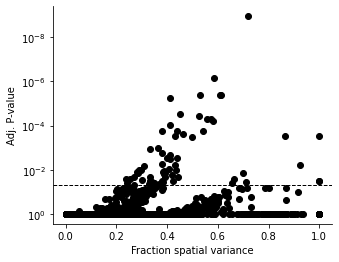

In [15]:
figsize(5, 4)
plt.yscale('log')

plt.scatter(results['FSV'], results['qval'], c='black')

plt.axhline(0.05, c='black', lw=1, ls='--');

plt.gca().invert_yaxis();
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');


###Automatic expression histology

####Essentially this is a way to identify genes that have similar co-expression patterns 

#### Get genes with qvalue less than < 0.05

In [17]:
sign_results = results.query('qval < 0.05')


"AEH requires two parameters: the number of patterns, and the characteristic lengthscale for histological patterns."

"For some guidance in picking the lengthscale l we can look at the optimal lengthscale for the signficant genes."



In [18]:
sign_results['l'].value_counts()


1.135190    38
1.907609    20
0.675535     9
Name: l, dtype: int64

l = 1.8 and C = 3 (# of patterns)

In [19]:
histology_results, patterns = SpatialDE.aeh.spatial_patterns(X, resid_expr, sign_results, C=3, l=1.8, verbosity=1)


/usr/local/lib/python3.8/dist-packages/SpatialDE/base.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])


iter 0, ELBO: -8.81e+08
iter 1, ELBO: -4.20e+08, delta_ELBO: 4.61e+08
iter 2, ELBO: -4.20e+08, delta_ELBO: 1.29e+03
iter 3, ELBO: -4.20e+08, delta_ELBO: 1.83e+03
iter 4, ELBO: -4.20e+08, delta_ELBO: 5.03e+02
iter 5, ELBO: -4.20e+08, delta_ELBO: 1.66e+02
iter 6, ELBO: -4.20e+08, delta_ELBO: 3.19e+00
iter 7, ELBO: -4.20e+08, delta_ELBO: 5.82e-02
iter 8, ELBO: -4.20e+08, delta_ELBO: 1.06e-03
Converged on iter 8


In [20]:
histology_results.head()


,g,pattern,membership
8473,Tspan7,0,1.000000
8534,4933405L10Rik,2,1.000000
9222,Taf7l,2,1.000000
9409,Olfr635,0,0.999915
10244,Cdr1,0,1.000000


####Visualize the common patterns

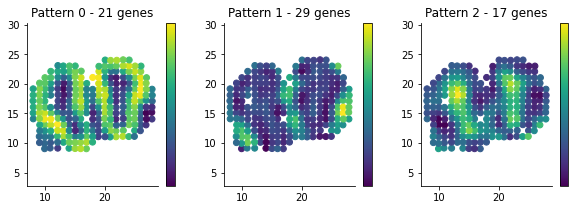

In [21]:
figsize(10, 3)
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=patterns[i]);
    plt.axis('equal')
    plt.title('Pattern {} - {} genes'.format(i, histology_results.query('pattern == @i').shape[0] ))
    plt.colorbar(ticks=[]);


In [22]:
for i in histology_results.sort_values('pattern').pattern.unique():
    print('Pattern {}'.format(i))
    print(', '.join(histology_results.query('pattern == @i').sort_values('membership')['g'].tolist()))
    print()


Pattern 0
Olfr635, Gna14, Atp1b1, Glul, Nrsn1, Doc2g, Cplx1, Trnp1, Gabra1, Slc1a2, Cdhr1, Tspan7, Slc6a11, Cpe, Aqp4, Igfbp2, Rab3b, Slc17a7, Cdr1, Sparcl1, Cck

Pattern 1
Igf1, Nr2f2, Sepp1, Ccnd1, Apoe, Ptn, Ptgds, Sash1, Gng13, Marcks, Vtn, Mcf2l, Fabp7, Igfbp5, Apod, Scd1, Kif5b, Apc, S100a5, Omp, Kctd12, Frzb, Lpar1, Pmepa1, Sorbs1, Trak2, Foxd3, Unc13c, Sfrp5

Pattern 2
4933405L10Rik, Tubb2b, Gpsm1, Ncdn, Mbp, Camk2b, Kcnh3, Pbx1, Penk, Nrgn, Arhgap33, Prokr2, Pcp4, Necab2, Taf7l, Rbfox3, Baiap2

